In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

/u/ki/swmclau2/PYENV/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
from astropy.io import fits
#dataDir = '/home/sean/Data/BuzzardSims/'
dataDir = '/nfs/slac/g/ki/ki19/des/erykoff/clusters/mocks/Buzzard/buzzard-1.1/des_y5/redmapper_v6.4.7/halos/'
hdulist = fits.open(dataDir+'buzzard-v1.1-y5_run_00340_lambda_chisq.fit')
data = hdulist[1].data

import numpy as np
mass = data['M200']
print 'Rows:\t%d'%mass.shape[0]
redshifts = data['Z']

mass = mass[redshifts<1.7]#for my approximation
redshifts = redshifts[redshifts<1.7]

logMass = np.log10(mass)

Rows:	76997


In [11]:
#First, will need the parameters
vals = {}
z = [0.23, 1.5]
vals['Mp'] = [2.0e14, 1.0e14]#*10^14
vals['A'] = [1.944, 0.293]
vals['B1'] = [1.97, 3.07]
vals['B2'] = [0.7, 1.2]
vals['B3'] = [0.40, 0.73]

z_params = {}
from scipy.stats import linregress
for key, val in vals.iteritems():
    slope, intercept, r, p, stderr = linregress(z, val)
    z_params[key] = (slope, intercept)
    
def getMassParams(z):
    return {key:val[0]*z+val[1] for key,val in z_params.iteritems()}

def n_approx(m,z):
    params = getMassParams(z)
    return params['A']*np.exp(-params['B1']*(m/params['Mp']) \
                    -0.5*params['B2']*(m/params['Mp'])**2 \
                    -0.166*params['B3']*(m/params['Mp'])**3)

def log_n_approx(m,z):
    params = getMassParams(z)
    return -1*(params['B1']*(m/params['Mp']) \
                    +0.5*params['B2']*(m/params['Mp'])**2 \
                    +0.166*params['B3']*(m/params['Mp'])**3)+np.log(params['A'])

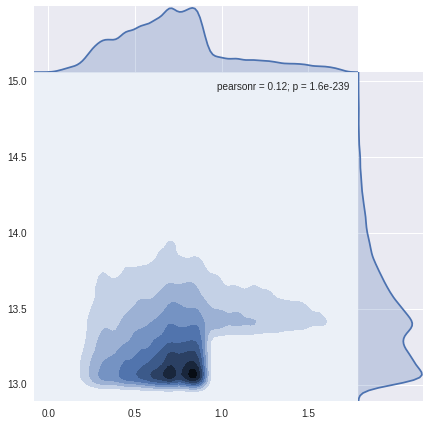

In [7]:
sns.jointplot(redshifts, logMass, kind = 'kde', space = 0)

Ok there are weird redshift bins. The division I see clearly on this plot is at z = 0.9. Since my "mass function" covers both of those bins, I'll test both cases. 

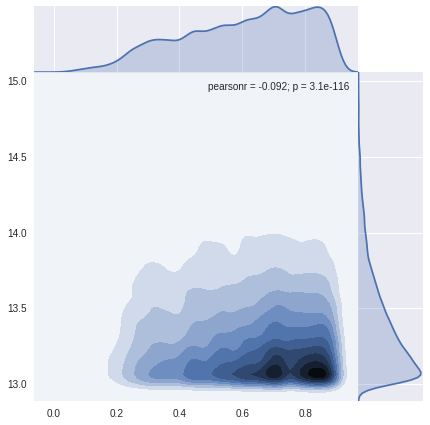

In [16]:
#Bin 1
logMass_1 = logMass[redshifts<.9]
mass_1 = mass[redshifts<.9]
redshift_1 = redshifts[redshifts<.9]
sns.jointplot(redshift_1, logMass_1, kind = 'kde', stat_fun = None, space = 0)

In [17]:
colors = sns.color_palette()

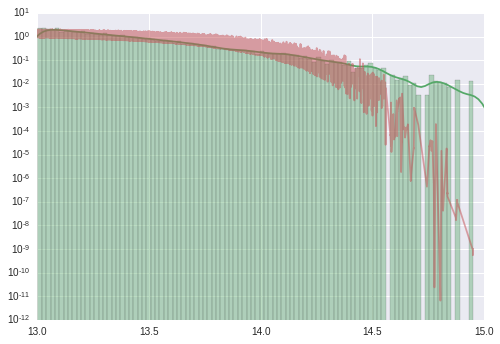

In [31]:
sns.distplot(logMass_1, bins = 100, color = colors[1])
plt.yscale('log')
plt.xlim([13,15])
plt.plot(logMass_1,n_approx(mass_1, redshift_1), color = colors[2], alpha = .5)
plt.show()

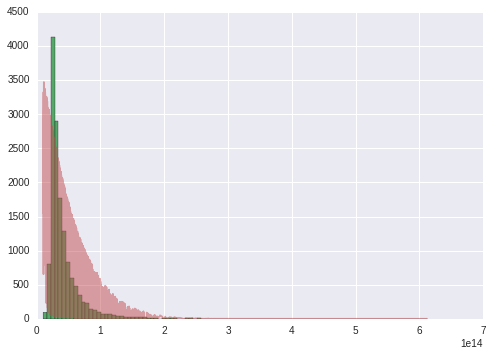

In [47]:
plt.hist(mass_1, bins = 100, color = colors[1])
plt.plot(mass_1,4000*n_approx(mass_1, redshift_1), color = colors[2], alpha = .5)
plt.show()

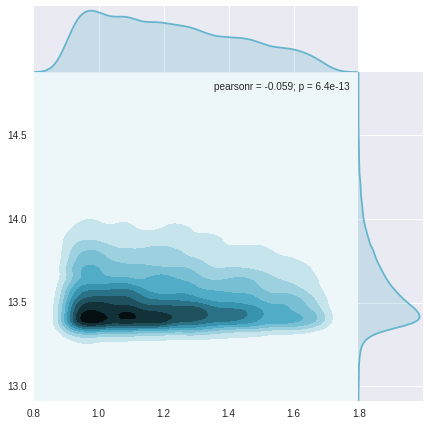

In [38]:
#Bin 1
logMass_1 = logMass[redshifts>.9]
mass_1 = mass[redshifts>.9]
redshift_1 = redshifts[redshifts>.9]
sns.jointplot(redshift_1, logMass_1, kind = 'kde', stat_fun = None, space = 0, color = colors[5])

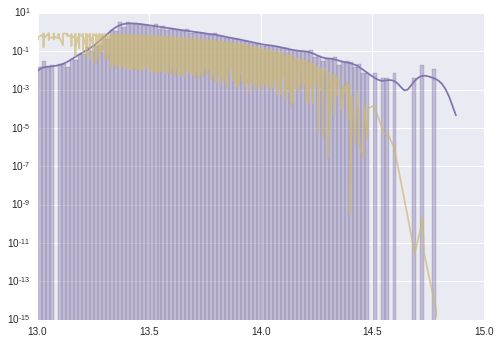

In [35]:
sns.distplot(logMass_1, bins = 100, color = colors[3])
plt.yscale('log')
plt.xlim([13,15])
plt.plot(logMass_1,n_approx(mass_1, redshift_1), color = colors[4], alpha = .7)
plt.show()

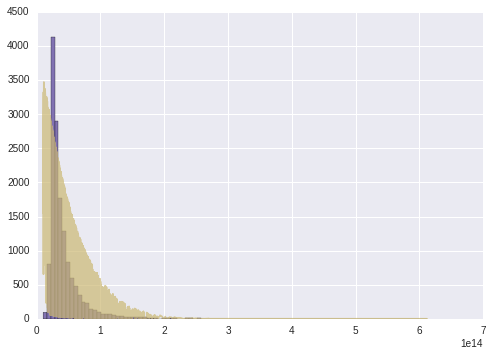

In [49]:
plt.hist(mass_1, bins = 100, color = colors[3])
plt.plot(mass_1,4000*n_approx(mass_1, redshift_1), color = colors[4], alpha = .7)
plt.show()

Both look fairly decent up to 14.5. I still am uncomfortable with how I've gotten the params but I 